In [45]:
import pandas as pd

matzip= pd.read_csv("matzipData.csv",encoding='utf-8')

matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Restaurant Name    400 non-null object
Rating             400 non-null object
Address            400 non-null object
Tel                350 non-null object
Food               400 non-null object
Price              397 non-null object
Parking            329 non-null object
Operating Time     364 non-null object
Holiday            126 non-null object
dtypes: object(9)
memory usage: 28.2+ KB


In [46]:
matzip.head()

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일


In [47]:
matzip['Holiday'].isnull().sum()

274

In [48]:
matzip['Holiday'].isnull()

0      False
1       True
2       True
3       True
4      False
5       True
6       True
7       True
8       True
9      False
10      True
11      True
12      True
13      True
14     False
15     False
16     False
17     False
18     False
19      True
20      True
21      True
22     False
23     False
24      True
25     False
26      True
27      True
28     False
29      True
       ...  
370    False
371     True
372     True
373     True
374     True
375     True
376     True
377     True
378    False
379    False
380     True
381    False
382    False
383     True
384    False
385     True
386     True
387    False
388    False
389     True
390     True
391     True
392    False
393    False
394     True
395    False
396     True
397    False
398     True
399     True
Name: Holiday, Length: 400, dtype: bool

In [49]:
matzip[matzip.Holiday.isnull()][['Holiday']].head() #null인 값을 반환한다.

,Holiday
1,NaN
2,NaN
3,NaN
5,NaN
6,NaN


In [50]:
matzip.Holiday.value_counts().head()

일          75
월          21
토, 일        7
화           3
일, 첫째 월     2
Name: Holiday, dtype: int64

In [51]:
matzip.Holiday = matzip.Holiday.fillna("연중무휴") #누락값을 알아내고 채우는 과정

In [52]:
matzip.Holiday.isnull().sum()

0

In [53]:
matzip.Price.value_counts() #int("12")는 정수로 바뀌어도 int("가나다")는 안바뀐다

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [54]:
matzip.Price.isnull().sum()

3

In [55]:
matzip_Price = matzip.Price.fillna('10000').copy()

In [56]:
matzip_Price.isnull().sum()

0

In [59]:
matzip_Price = (matzip_Price.str.replace("만원","10000") 
     .str.replace('210000',"20000")     
     .str.replace('310000',"30000")     
     .str.replace('410000',"40000")  
     .str.replace('미만',"")  
     .str.replace('이상',"") 
     .str.replace('10000-',"")     
     .str.replace('20000-',"")     
     .str.replace('30000-',"")
     .str.strip()
     )
matzip_Price

0      20000
1      30000
2      40000
3      40000
4      10000
5      30000
6      10000
7      10000
8      10000
9      40000
10     10000
11     30000
12     30000
13     20000
14     30000
15     20000
16     20000
17     10000
18     10000
19     10000
20     20000
21     10000
22     30000
23     10000
24     10000
25     20000
26     20000
27     10000
28     20000
29     20000
       ...  
370    10000
371    20000
372    10000
373    20000
374    20000
375    10000
376    20000
377    30000
378    20000
379    20000
380    10000
381    10000
382    20000
383    10000
384    40000
385    20000
386    10000
387    30000
388    10000
389    20000
390    10000
391    20000
392    10000
393    10000
394    20000
395    20000
396    20000
397    20000
398    10000
399    10000
Name: Price, Length: 400, dtype: object

In [61]:
matzip_Price.isnull().sum()

0

In [62]:
matzip_Price.sort_values().head()

399    10000
133    10000
305    10000
136    10000
302    10000
Name: Price, dtype: object

In [63]:
matzip_Price = matzip_Price.astype('float')

In [64]:
matzip_Price.value_counts()

10000.0    162
20000.0    161
30000.0     46
40000.0     31
Name: Price, dtype: int64

In [65]:
matzip_Price = matzip_Price.astype('int64')

In [66]:
matzip_Price.value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [68]:
matzip.Price=matzip_Price #작업했던 시리즈 객체를 다시 집어넣었다.

In [69]:
matzip.Rating.value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
3.3      5
4.6      5
3.4      4
3.6      4
4.7      3
3.8      2
2.7      1
3.2      1
3.1      1
Name: Rating, dtype: int64

In [71]:
matzip.Rating = matzip.Rating.str.replace('-','0.0')

In [72]:
matzip.Rating.value_counts().head()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
Name: Rating, dtype: int64

In [78]:
matzip.Rating = matzip.Rating.astype('float')

In [79]:
matzip.Rating.dtype

dtype('float64')

In [80]:
matzip.Parking.isnull().sum()

71

In [81]:
matzip.Parking = matzip.Parking.fillna("주차공간없음")

In [82]:
matzip.Parking.isnull().sum()

0

In [83]:
matzip.head()

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,20000,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,30000,유료주차 가능,11:30 - 21:30,연중무휴
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,40000,주차공간없음,월-토: 11:30 - 23:00 일: 17:30 - 23:00,연중무휴
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,40000,발렛,06:00 - 22:00,연중무휴
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,10000,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일


In [88]:
%matplotlib inline

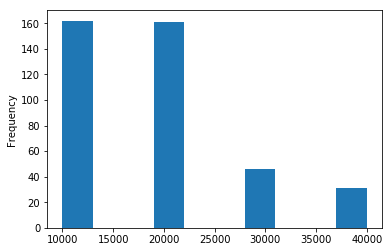

In [89]:
matzip['Price'].plot.hist()

In [92]:
#matzip['parkin'].plot.hist #수치 값이 아니라서 오류가 뜬다.

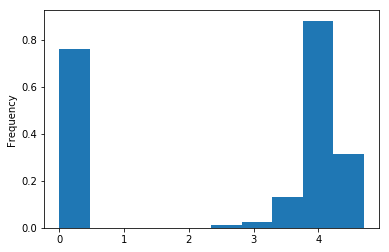

In [93]:
matzip.loc[matzip['Price'] <= 10000]['Rating'].plot.hist(normed=True)

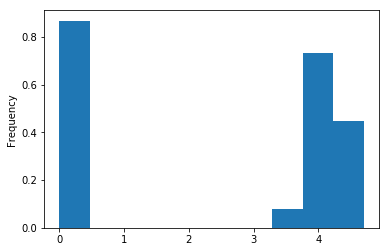

In [94]:
matzip.loc[matzip['Price'] >= 20000]['Rating'].plot.hist(normed=True)

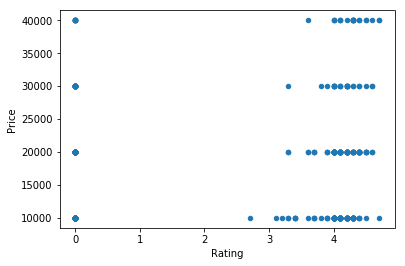

In [95]:
matzip.plot.scatter('Rating', 'Price')

In [99]:
matzip_star = matzip[(matzip.Rating >=  3) & (matzip.Price <= 20000)]

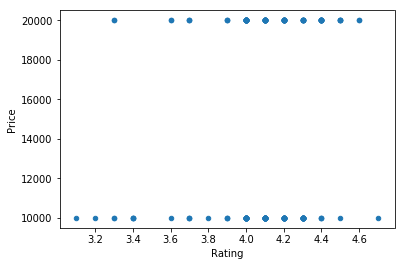

In [100]:
matzip_star.plot.scatter('Rating','Price')